# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information. Imperial = Fahrenheit 
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define Query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
#weather_response = requests.get(query_url + city)
#weather_json = weather_response.json()
#print(json.dumps(weather_json, indent=2))

In [5]:
# Set Lists for the DataFrame
city_name = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# Set initial value for counters 
counter = 0
set_count = 1

# Print Starting Log Statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Create Loop for Weather Check Call for each City 
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
                                
        if counter > 49:
            counter = 1
            set_count += 1
            city_name.append(city)
                                
        else:
            counter += 1
            city_name.append(city)
        print(f"Processing Record {counter} of Set {set_count} | {city}")
    
    except Exception:
        print("City not found. Skipping...")

# Print Ending Log Statement
print("------------------------------\nData Retrieval Complete\n------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | chapais
Processing Record 4 of Set 1 | albany
City not found. Skipping...
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | rizhao
Processing Record 7 of Set 1 | geraldton
Processing Record 8 of Set 1 | saint john
Processing Record 9 of Set 1 | provideniya
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | bonthe
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | buala
Processing Record 16 of Set 1 | cabra
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | cobija
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | desaguadero
Processing

Processing Record 37 of Set 4 | garmsar
Processing Record 38 of Set 4 | moen
Processing Record 39 of Set 4 | avarua
Processing Record 40 of Set 4 | torbay
Processing Record 41 of Set 4 | perumpavur
Processing Record 42 of Set 4 | yongan
Processing Record 43 of Set 4 | el dorado
Processing Record 44 of Set 4 | santa rosalia
Processing Record 45 of Set 4 | hambantota
Processing Record 46 of Set 4 | kudahuvadhoo
Processing Record 47 of Set 4 | norman wells
Processing Record 48 of Set 4 | kindu
City not found. Skipping...
Processing Record 49 of Set 4 | lagoa
Processing Record 50 of Set 4 | ossora
City not found. Skipping...
Processing Record 1 of Set 5 | tiarei
Processing Record 2 of Set 5 | katsuura
Processing Record 3 of Set 5 | odesskoye
Processing Record 4 of Set 5 | hasaki
Processing Record 5 of Set 5 | broome
Processing Record 6 of Set 5 | sturgeon falls
Processing Record 7 of Set 5 | neryungri
Processing Record 8 of Set 5 | ripollet
Processing Record 9 of Set 5 | jutai
Processing R

Processing Record 21 of Set 8 | teguise
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 | okhotsk
City not found. Skipping...
Processing Record 23 of Set 8 | cerritos
Processing Record 24 of Set 8 | bealanana
Processing Record 25 of Set 8 | lazaro cardenas
Processing Record 26 of Set 8 | keningau
Processing Record 27 of Set 8 | saint-augustin
Processing Record 28 of Set 8 | kununurra
Processing Record 29 of Set 8 | wanning
Processing Record 30 of Set 8 | shanghai
City not found. Skipping...
Processing Record 31 of Set 8 | garowe
Processing Record 32 of Set 8 | namatanai
Processing Record 33 of Set 8 | nioaque
Processing Record 34 of Set 8 | bosaso
Processing Record 35 of Set 8 | grand-santi
Processing Record 36 of Set 8 | hobyo
City not found. Skipping...
Processing Record 37 of Set 8 | ondo
Processing Record 38 of Set 8 | cervo
Processing Record 39 of Set 8 | nome
Processing Record 40 of Set 8 | katherine
Processing Record 41 of Set 8 | codrington

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary for establishing dataframe
weather_dict = {
    "City":city_name,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}

# Create DataFrame
weather_df = pd.DataFrame(weather_dict)

# View DataFrame 
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,busselton,89,AU,1570315431,71,-33.64,115.35,52.0,6.33
1,punta arenas,75,CL,1570315431,65,-53.16,-70.91,46.4,10.29
2,chapais,1,CA,1570315431,57,49.78,-74.86,48.2,3.36
3,albany,20,US,1570315432,70,42.65,-73.75,55.4,4.70
4,hermanus,65,ZA,1570315432,92,-34.42,19.24,57.0,11.72


In [7]:
# Export data as csv 
weather_df.to_csv("WeatherPy_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [8]:
# Import matplotlib style to stylize the graphs so they look nicer 
import matplotlib.style as style
style.use("seaborn")

# Get Current Time for Graph Titles
from datetime import date
today = date.today()
print(today)

2019-10-05


#### Latitude vs. Temperature Plot

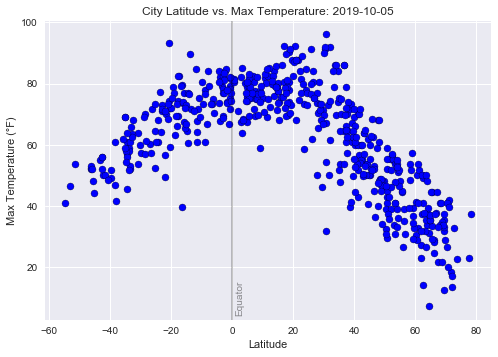

In [9]:
# Plot Latitute and Temperature in a Scatter Graph  
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolors="blue", marker="o", edgecolor="black")
plt.grid()

# Label Graph 
plt.title("City Latitude vs. Max Temperature: {}".format(today))
plt.ylabel("Max Temperature (°F)")
plt.xlabel("Latitude")
plt.grid(color="w", linestyle="solid")

# Added a Equator Line for Funsies (also to help distiginsh the correlation of data with the equator) 
plt.axvline(0, color = "black", alpha = .25, label = "Equator")
plt.text(1,5,"Equator",rotation=90, alpha= .50)

# Export Graph as png 
plt.savefig("01_Lat_vs_Temp.png")

# View Graph 
plt.show()

#### Latitude vs. Humidity Plot

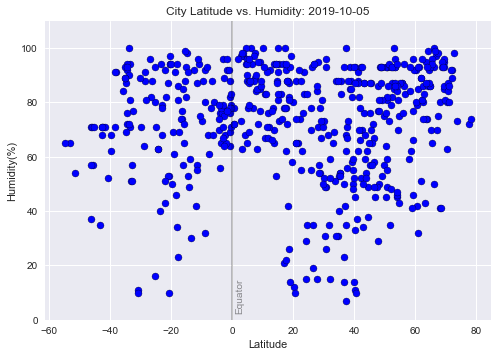

In [10]:
# Plot Latitute and Humidity in a Scatter Graph  
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolors="blue", marker="o", edgecolor="black")
plt.grid()

# Label Graph 
plt.title("City Latitude vs. Humidity: {}".format(today))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")

# Setting Y Limit due to Outlier 
plt.ylim(0,110)

# Format Graph 
plt.grid(color="w", linestyle="solid")
plt.axvline(0, color = "black", alpha = .25, label = "Equator")
plt.text(1,3,"Equator",rotation=90, alpha= .50)

# Export Graph as png 
plt.savefig("02_Lat_vs_Humidity.png")

# View Graph 
plt.show()

#### Latitude vs. Cloudiness Plot

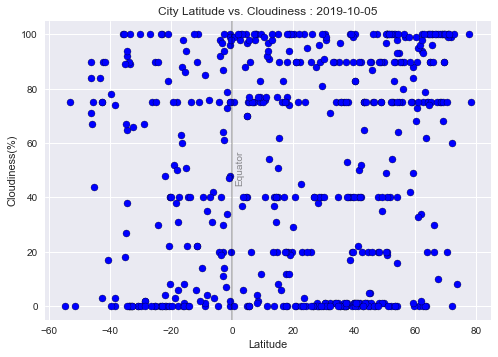

In [11]:
# Plot Latitute and Cloudiness in a Scatter Graph  
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolors="blue", marker="o", edgecolor="black")
plt.grid()

# Label Graph 
plt.title("City Latitude vs. Cloudiness : {}".format(today))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")

# Format Graph 
plt.grid(color="w", linestyle="solid")
plt.axvline(0, color = "black", alpha = .25, label = "Equator")
plt.text(1,45,"Equator",rotation=90, alpha =.50)

# Export Graph as png 
plt.savefig("03_Lat_vs_Cloudiness.png")

# View Graph 
plt.show()

#### Latitude vs. Wind Speed Plot

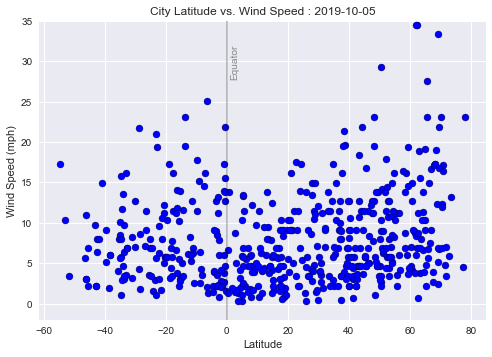

In [12]:
# Plot Latitute and Wind Speed in a Scatter Graph  
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolors="blue", marker="o", edgecolor="black")
plt.grid()

# Label Graph 
plt.title("City Latitude vs. Wind Speed : {}".format(today))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")

# Format Graph Lines 
plt.grid(color="w", linestyle="solid")
plt.axvline(0, color = "black", alpha = .25, label = "Equator")
plt.text(1,28,"Equator",rotation=90, alpha= .50)
plt.ylim(-2,35)

# Export Graph as png 
plt.savefig("04_Lat_vs_WindSpeed.png")

# View Graph 
plt.show()

## Observations 
You must include a written description of three observable trends based on the data.

* Looking at Latitude vs Temperatures data, it appears that the higher temperatures generally are in the Latitude range of -5 to 35. As you go away from this range the temperatures seem to decline, showing there is a trend of temperatures rising as you near the equator. 


* There does not seem to be a significant correlation between Humidity and Latitude. Looking at the data in the cities we pulled, the majority of the cities are between 60 and 100% Humidity levels. Using this data we could say max Humidity levels for these cities would be 100% Humidity; and under 60% as the Humidity Levels decrease the number of cities also decrease. 


* Again there doesn't seem to be any significant correlation between Latitude and Cloudiness or Wind Speed. However, we can observe a trend in the frequency of Wind Speed. According to this data Wind Speeds between 0 and 10 mph have the most frequency. Wind Speed frequency seems to decrease as the Wind Speed increases growing sparse above 20 mph.
